In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_regression

In [292]:
df = pd.read_excel('train.xlsx')
df.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [294]:
df.describe(include='all')

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
count,4548.000000,4548,4548,4548,3959.000000,4548.000000,4547,2171,4548,4472,...,4535,4523,3,1,3,1,1,1,4548,4548.000000
unique,NaN,2,3817,353,NaN,NaN,2765,839,1312,3640,...,10,55,3,1,3,1,1,1,181,NaN
top,NaN,matematika,Репетитор по информатике Терехов Артем Владими...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",NaN,NaN,Репетитор не предоставил о себе дополн...,Репетитор не предоставил информаци...,Санкт-Петербургский государственный университет,"Год окончания: 2026, Факультет: Институт инфо...",...,Частный преподаватель,4 года,Кандидат технических наук,"Год окончания: 2020, Специальность: Учитель м...",Доктор физико-математических наук,"ООО ""Столичный учебный центр""",,,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",NaN
freq,NaN,3685,9,1654,NaN,NaN,1123,832,176,12,...,2345,475,1,1,1,1,1,1,1256,NaN
mean,2273.500000,NaN,NaN,NaN,1.895933,2.989006,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.197949
std,1313.038842,NaN,NaN,NaN,2.280103,8.516939,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.485108
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041667
25%,1136.750000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
50%,2273.500000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000
75%,3410.250000,NaN,NaN,NaN,4.000000,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.888889


Колонки Unnamed: 0, ФИО, Ученая степень 2, Ученое звание 2 - удаляем без обработки

description	experience_desc, Education_1, Desc_Education_1, Education_2, Desc_Education_2, Education_3, Desc_Education_3,
Education_4, Desc_Education_4, Education_5, Desc_Education_5, Education_6, Desc_Education_6 -удаляем после оработки

tutor_rating и tutor_reviews nan заполняем нулями

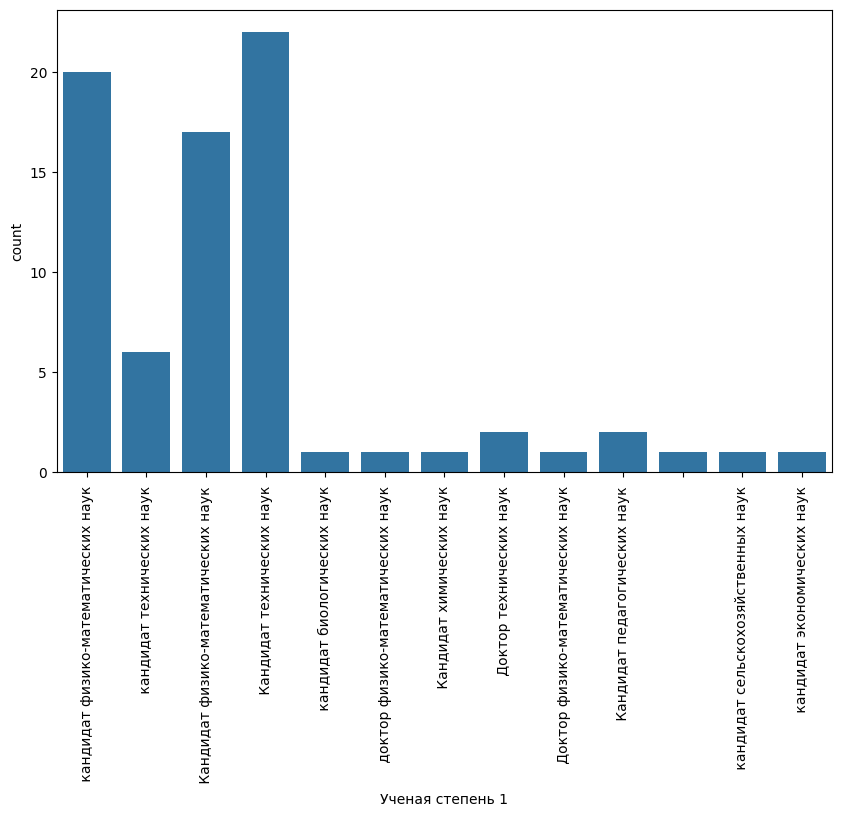

In [295]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ученая степень 1')
plt.xticks(rotation=90)
plt.show()

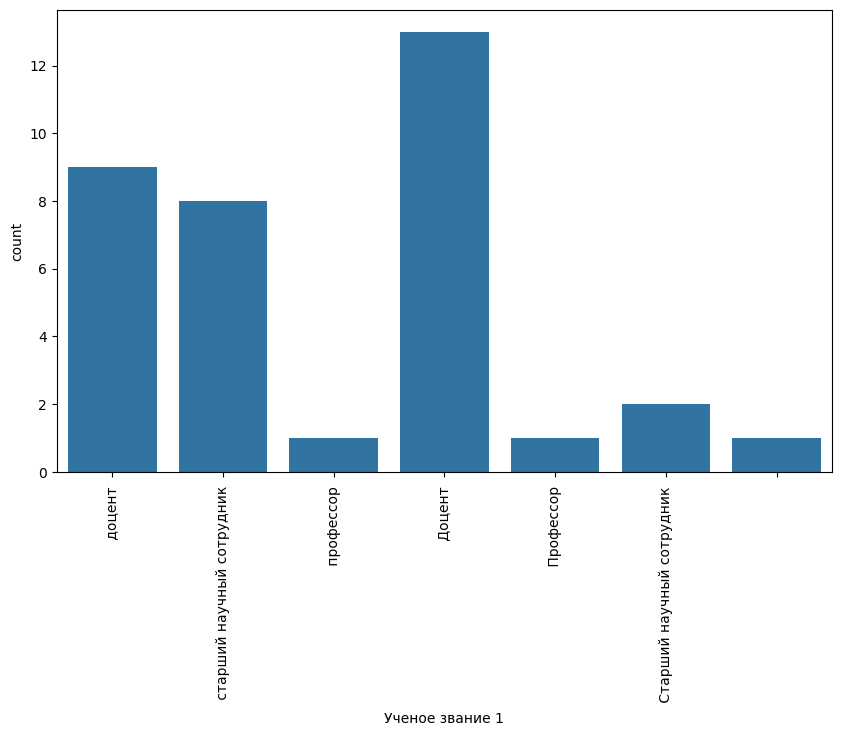

In [296]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ученое звание 1')
plt.xticks(rotation=90)
plt.show()

Колонки Ученая степень 1 и Ученое звание 1 как будто бы пустые строки, но они не пустые. Надо их превратить в отсутствует.

In [297]:
df['tutor_head_tags'].value_counts()

,count
tutor_head_tags,
"['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']",1654
"['Школьная программа', 'Подготовка к ОГЭ']",815
['Школьная программа'],482
"['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ', 'Подготовка к олимпиадам']",334
"['Подготовка к ЕГЭ', 'Подготовка к ОГЭ']",150
...,...
"['Школьная программа', 'Математический анализ', 'Линейная алгебра', 'Теория вероятности и мат. статистика']",1
"['Школьная программа', 'Линейная алгебра', 'Дифференциальные уравнения', 'Уравнения мат физики', 'Математическая логика', 'Дискретная математика']",1
"['Школьная программа', 'Математический анализ', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ', 'Теория вероятности и мат. статистика', 'Математическая логика']",1


2 Pipeline

In [298]:
# Класс для удаления столбцов нечисловых и специфических столбцов
class NonNummericAndSpecifiColumnsDropper(BaseEstimator, TransformerMixin):
  def __init__(self, specific_columns):
    self.columns = specific_columns

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X.drop(self.columns, axis=1, inplace=True)
    X = X.select_dtypes(include=['number'])
    return X

In [299]:
# Класс для заполнения пропущенных значений
class NanCompleter(BaseEstimator, TransformerMixin):
  def __init__(self, columns, value=0):
    self.columns = columns
    self.value = value

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X[self.columns] = X[self.columns].fillna(self.value)
    return X

In [300]:
# Оработка столбца experience. Преобразуем в число, там где nan ставим 0
class ExperienceTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        def convert_experience(value):
            if pd.isna(value):
                return 0
            try:
                return int(value.split()[0])
            except (ValueError, IndexError):
                return 0

        X['experience'] = X['experience'].apply(convert_experience)
        return X

In [301]:
# Обработка колонки description. Делаем новую колонку has_description, где 1 - есть описание, 0 - нет
class DescriptionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def __is_described(self, string):
      if pd.isna(string):
        return 0
      elif str(string).startswith('Репетитор не предоставил'):
        return 0
      else:
        return 1

    def transform(self, X):
      X['has_description'] = X['description'].apply(self.__is_described)
      return X

In [302]:
# Класс для подсчета количества образований. Построчно считаем количество образований.
class EducationsCounter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
      X['educations_count'] = X[['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']].notna().sum(axis=1)
      return X

In [303]:
# Класс для кодирования ученых степеней и званий
class AcademicDegreeAndTitleTransformer(BaseEstimator, TransformerMixin):

    def __get_non_alphanumeric_values(self, X, column_name):
      def is_alphanumeric(text):
        if pd.isna(text):
            return False
        return bool(re.search(r'\w', text))
      filtered_df = X[~X[column_name].apply(is_alphanumeric) & ~X[column_name].isna()]
      return filtered_df[column_name].unique()

    def __transform_column_values(self, X, column_names):
      for column_name in column_names:
        non_aplhanumeric = self.__get_non_alphanumeric_values(X, column_name)
        X[column_name + '_encoded'] = X[column_name].apply(lambda x: 'отсутствует' if (pd.isna(x) or x in non_aplhanumeric) else x)
        X[column_name + '_encoded'] = X[column_name + '_encoded'].str.lower()
      return X

    def __init__(self, X):
        self.academic_degree_one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        self.academic_title_one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, X, y=None):
        self.__transform_column_values(X, ['Ученая степень 1', 'Ученое звание 1'])
        self.academic_degree_one_hot_encoder.fit(X[['Ученая степень 1_encoded']])
        self.academic_title_one_hot_encoder.fit(X[['Ученое звание 1_encoded']])
        return self

    def transform(self, X):
        if('Ученая степень 1_encoded' not in X.columns or 'Ученое звание 1_encoded' not in X.columns):
          X = self.__transform_column_values(X, ['Ученая степень 1', 'Ученое звание 1'])
        degree_encoded = self.academic_degree_one_hot_encoder.transform(X[['Ученая степень 1_encoded']])
        title_encoded = self.academic_title_one_hot_encoder.transform(X[['Ученое звание 1_encoded']])
        degree_cols = self.academic_degree_one_hot_encoder.get_feature_names_out(['Ученая степень 1_encoded'])
        title_cols = self.academic_title_one_hot_encoder.get_feature_names_out(['Ученое звание 1_encoded'])
        X = pd.concat([X, pd.DataFrame(degree_encoded, columns=degree_cols, index=X.index),
                       pd.DataFrame(title_encoded, columns=title_cols, index=X.index)], axis=1)
        if 'Ученая степень 1' in X.columns and 'Ученое звание 1' in X.columns:
          X.drop(['Ученая степень 1_encoded', 'Ученое звание 1_encoded'], axis=1, inplace=True)
        return X

In [304]:
class SubjectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
      self.ohe= OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, X, y=None):
      self.ohe.fit(X[['предмет']])
      return self

    def transform(self, X):
      subject_encoded = self.ohe.transform(X[['предмет']])
      subject_cols = self.ohe.get_feature_names_out(['предмет'])
      X = pd.concat([X, pd.DataFrame(subject_encoded, columns=subject_cols, index=X.index)], axis=1)
      return X



In [305]:
preprocessing_pipe = Pipeline(
    steps=[
        ('education_count', EducationsCounter()),
        ('academic_degree_and_title', AcademicDegreeAndTitleTransformer(df)),
        ('experience', ExperienceTransformer()),
        ('description', DescriptionTransformer()),
        ('nan_completer', NanCompleter(columns=['tutor_rating', 'tutor_reviews'], value=0)),
        ('subject', SubjectTransformer()),
        ('drop', NonNummericAndSpecifiColumnsDropper(specific_columns=['Unnamed: 0']))
    ]
)

df = preprocessing_pipe.fit_transform(df)

<Axes: >

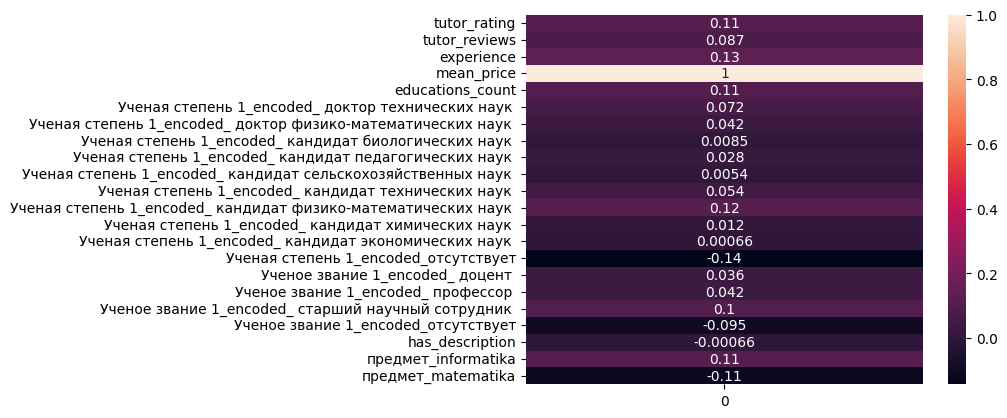

In [306]:
sns.heatmap(df.corrwith(df['mean_price']).to_frame(), annot=True)

<Axes: >

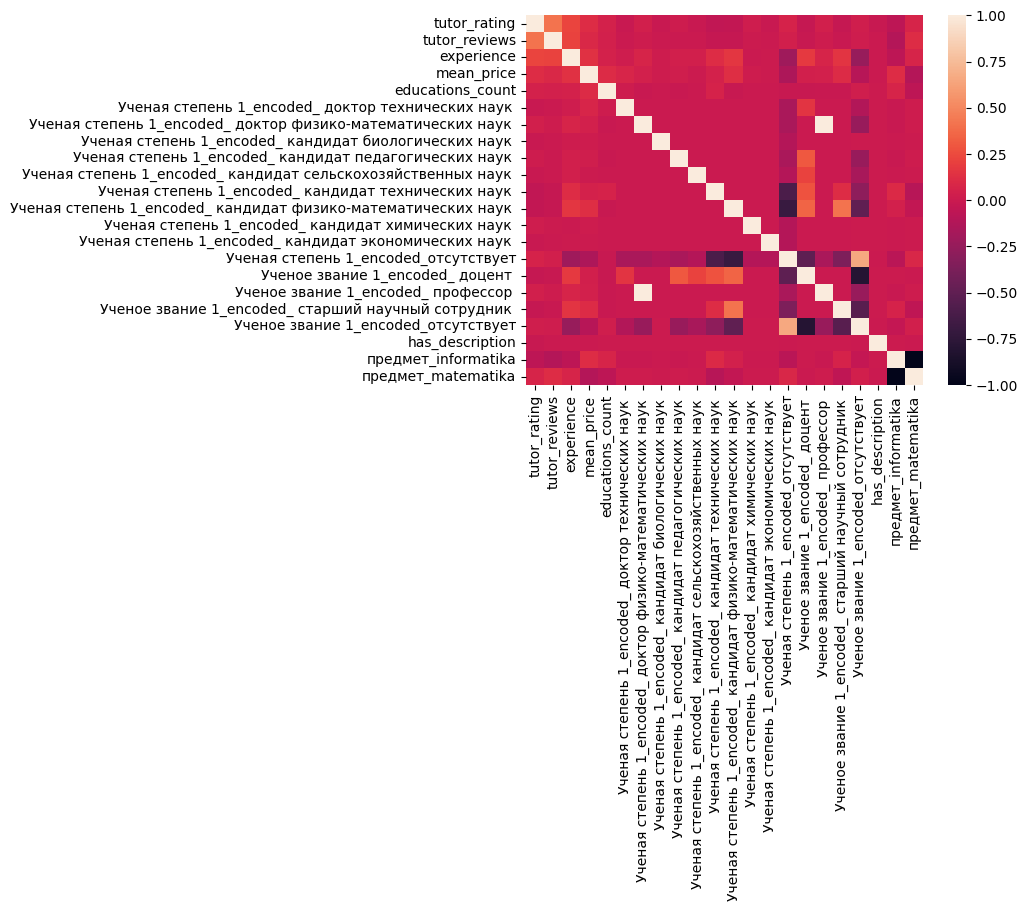

In [307]:
sns.heatmap(df.corr())

In [308]:
class FeatureSelector (BaseEstimator, TransformerMixin):
  def __init__(self, qty=10, score_f=f_regression):
    self.selector = SelectKBest(score_f, k=qty)

  def fit(self, X, y=None):
    X_features = X.drop('mean_price', axis=1)
    y = X['mean_price']
    self.selector.fit(X_features, y)
    self.selected_columns = X_features.columns[self.selector.get_support()]
    return self

  def transform(self, X):
    if 'mean_price' in X.columns:
      X_features = X.drop('mean_price', axis=1)
    else:
      X_features = X.copy()
    columns_to_drop = X_features.columns.difference(self.selected_columns)
    return X.drop(columns_to_drop, axis=1)

In [309]:
feature_selector = FeatureSelector()
df = feature_selector.fit_transform(df)
df

,tutor_rating,tutor_reviews,experience,mean_price,educations_count,Ученая степень 1_encoded_ кандидат физико-математических наук,Ученая степень 1_encoded_отсутствует,Ученое звание 1_encoded_ старший научный сотрудник,Ученое звание 1_encoded_отсутствует,предмет_informatika,предмет_matematika
0,5.0,2,31,16.666667,1,0.0,1.0,0.0,1.0,0.0,1.0
1,4.0,7,8,11.666667,2,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0,11,23.333333,3,0.0,1.0,0.0,1.0,1.0,0.0
3,4.0,19,5,0.116667,1,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0,19,16.666667,1,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4543,4.0,11,5,16.666667,1,0.0,1.0,0.0,1.0,0.0,1.0
4544,0.0,0,30,33.333333,1,0.0,1.0,0.0,1.0,1.0,0.0
4545,0.0,0,6,23.333333,1,0.0,1.0,0.0,1.0,1.0,0.0
4546,0.0,0,1,9.722222,1,0.0,1.0,0.0,1.0,1.0,0.0


<Axes: >

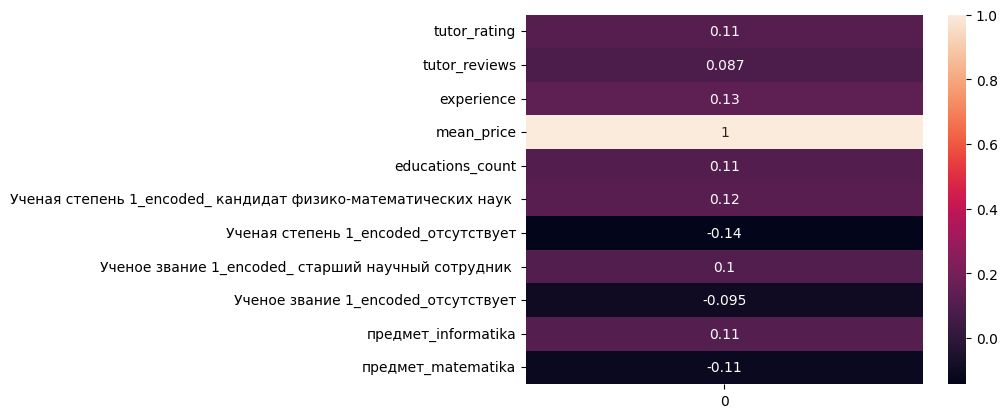

In [310]:
sns.heatmap(df.corrwith(df['mean_price']).to_frame(), annot=True)

In [311]:
X = df.drop('mean_price', axis=1)
Y = df['mean_price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rfr_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

rfr = RandomForestRegressor()
rfr_grid_search = GridSearchCV(rfr, rfr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfr_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error')

In [312]:
model = rfr_grid_search.best_estimator_
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 86.96837215047685


In [313]:
knn_param_grid = {
    'n_neighbors': [2, 3, 5, 10, 15, 20, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)

knn_model = knn_grid_search.best_estimator_
y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'KNN Mean Squared Error: {mse_knn}')

KNN Mean Squared Error: 92.70213290470006


In [319]:
abr_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential'],
    'estimator': [DecisionTreeRegressor(max_depth=d) for d in [3, 5, 10]]
}

abr = AdaBoostRegressor()
abr_grid_search = GridSearchCV(abr, abr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
abr_grid_search.fit(X_train_scaled, y_train)

abr_model = abr_grid_search.best_estimator_
y_pred_abr = abr_model.predict(X_test_scaled)
mse_abr = mean_squared_error(y_test, y_pred_abr)
print(f'AdaBoost Mean Squared Error: {mse_abr}')

AdaBoost Mean Squared Error: 87.86365176047688


In [315]:
pipe = Pipeline(
    steps=[
        ('preprocessing', preprocessing_pipe),
        ('feature_selector', feature_selector),
        ('scaler', scaler)]
    )

In [317]:
df_test = pd.read_excel('test.xlsx')
df_test.head()

df_after_pipe = pipe.transform(df_test)
predictions = model.predict(df_after_pipe)

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [318]:
df_predictions = pd.DataFrame({'mean_price': predictions}, index=df_test.index)
df_predictions.to_csv('predictions.csv', index_label='index')

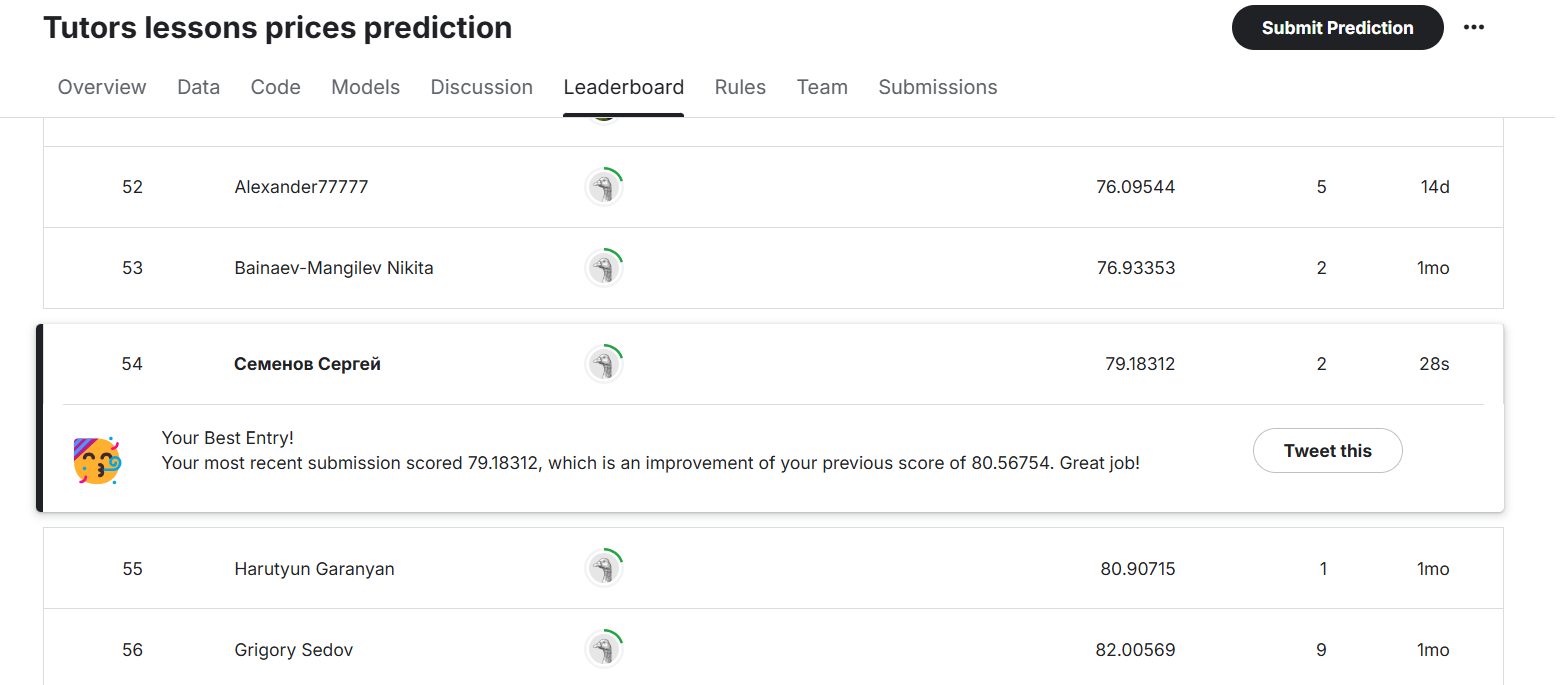